In [4]:
import numpy as np 
import pandas as pd

import sys
import os

classes_path = os.path.abspath(r"D:\Repositories\PhD\src\classes")
src_path = os.path.abspath(r"D:\Repositories\PhD\src\functions")
sys.path.append(src_path)
sys.path.append(classes_path)
print(sys.path)

import helpers
import data_processing as dp
import lstm
import ee_model

['d:\\Anaconda\\python313.zip', 'd:\\Anaconda\\DLLs', 'd:\\Anaconda\\Lib', 'd:\\Anaconda', '', 'd:\\Anaconda\\Lib\\site-packages', 'd:\\Anaconda\\Lib\\site-packages\\win32', 'd:\\Anaconda\\Lib\\site-packages\\win32\\lib', 'd:\\Anaconda\\Lib\\site-packages\\Pythonwin', 'D:\\Repositories\\PhD\\src\\functions', 'D:\\Repositories\\PhD\\src\\classes', 'D:\\Repositories\\PhD\\src\\functions', 'D:\\Repositories\\PhD\\src\\classes', 'D:\\Repositories\\PhD\\src\\functions', 'D:\\Repositories\\PhD\\src\\classes', 'D:\\Repositories\\PhD\\src\\functions', 'D:\\Repositories\\PhD\\src\\classes']


In [5]:
import matplotlib.pyplot as plt

In [6]:
import importlib

In [7]:
importlib.reload(lstm)

<module 'lstm' from 'D:\\Repositories\\PhD\\src\\classes\\lstm.py'>

In [8]:
df_channels = pd.read_csv(r"D:\Repositories\PhD\parsed_data\ICE_data\processed_Channels.csv")

In [9]:
df_channels

,Channel_1_processed,Channel_2_processed,Channel_3_processed
0,-2.598868,-1.707527,-1.607260
1,-2.598868,-1.707527,-1.607260
2,-3.138102,-2.076029,-1.799509
3,-2.016318,-1.687787,-1.621627
4,-2.512848,-1.682211,-1.827090
...,...,...,...
180552,1.811684,0.937021,0.490731
180553,1.838033,0.958260,0.498567
180554,1.862986,0.960541,0.497990
180555,1.852249,0.946718,0.494733


# Channel 1 Training

In [5]:
data_process = dp.DataProcesser()

In [6]:
train_loader_c1, val_loader_c1, test_loader_c1, scaler_c1 = data_process.prepare_autoregressive_data(df_channels['Channel_1_processed'], window_size=10, stride=1, train_ratio=0.7, val_ratio=0.15, batch_size=32, test=False, scaler_method = 'standard')

In [16]:
lstm_c1 = lstm.LSTMModel(input_size = 1, hidden_size = 64, num_layers = 2, output_size = 1)

In [17]:
lstm_c1, history = lstm_c1.train_lstm(train_loader_c1, val_loader_c1, num_epochs=100, learning_rate=0.001, channel = '1')

Epoch [1/100], Train Loss: 0.0175, Val Loss: 0.0106
Epoch [2/100], Train Loss: 0.0117, Val Loss: 0.0157
Epoch [3/100], Train Loss: 0.0114, Val Loss: 0.0099
Epoch [4/100], Train Loss: 0.0111, Val Loss: 0.0472
Epoch [5/100], Train Loss: 0.0107, Val Loss: 0.0103
Epoch [6/100], Train Loss: 0.0105, Val Loss: 0.0098
Epoch [7/100], Train Loss: 0.0102, Val Loss: 0.0100
Epoch [8/100], Train Loss: 0.0098, Val Loss: 0.0101
Epoch [9/100], Train Loss: 0.0095, Val Loss: 0.0108
Epoch [10/100], Train Loss: 0.0088, Val Loss: 0.0099
Epoch [11/100], Train Loss: 0.0086, Val Loss: 0.0107
Early stopping triggered.
Model saved to best_lstm_model_channel_1.pth
Training complete!


In [18]:
history_c1 = history

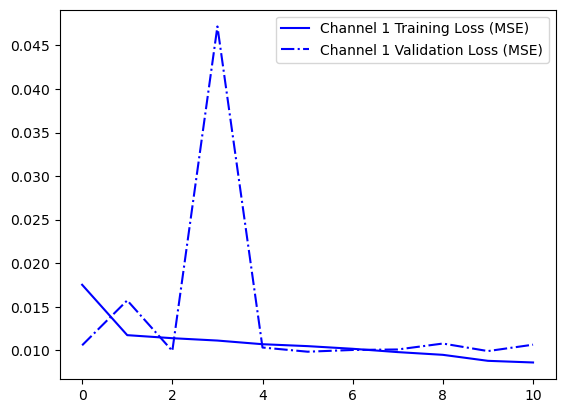

In [25]:
plt.plot(history_c1['train_loss'], '-', color = 'b', label = 'Channel 1 Training Loss (MSE)')
plt.plot(history_c1['val_loss'], '-.', color = 'b', label = 'Channel 1 Validation Loss (MSE)')
plt.legend()

# Channel 2 Training

In [30]:
train_loader_c2, val_loader_c2, test_loader_c2, scaler_c2 = data_process.prepare_autoregressive_data(df_channels['Channel_2_processed'], window_size=10, stride=1, train_ratio=0.7, val_ratio=0.15, batch_size=32, test=False, scaler_method = 'standard')

In [31]:
lstm_c2 = lstm.LSTMModel(input_size = 1, hidden_size = 64, num_layers = 2, output_size = 1)

In [32]:
lstm_c2, history_c2 = lstm_c1.train_lstm(train_loader_c2, val_loader_c2, num_epochs=100, learning_rate=0.001, channel = '2')

Epoch [1/100], Train Loss: 0.0089, Val Loss: 0.0130
Epoch [2/100], Train Loss: 0.0076, Val Loss: 0.0127
Epoch [3/100], Train Loss: 0.0065, Val Loss: 0.0124
Epoch [4/100], Train Loss: 0.0059, Val Loss: 0.0138
Epoch [5/100], Train Loss: 0.0055, Val Loss: 0.0121
Epoch [6/100], Train Loss: 0.0052, Val Loss: 0.0115
Epoch [7/100], Train Loss: 0.0049, Val Loss: 0.0124
Epoch [8/100], Train Loss: 0.0046, Val Loss: 0.0122
Epoch [9/100], Train Loss: 0.0045, Val Loss: 0.0128
Epoch [10/100], Train Loss: 0.0044, Val Loss: 0.0144
Epoch [11/100], Train Loss: 0.0043, Val Loss: 0.0130
Early stopping triggered.
Model saved to best_lstm_model_channel_2.pth
Training complete!


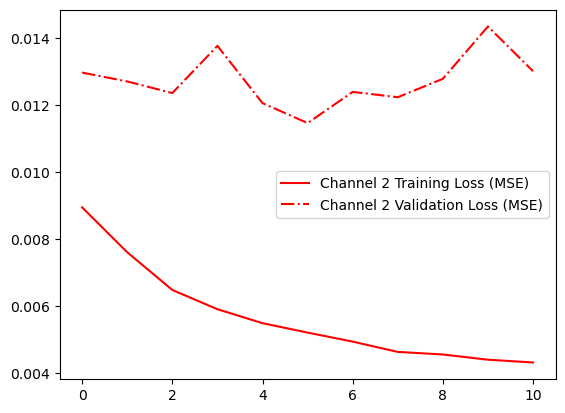

In [33]:
plt.plot(history_c2['train_loss'], '-', color = 'r', label = 'Channel 2 Training Loss (MSE)')
plt.plot(history_c2['val_loss'], '-.', color = 'r', label = 'Channel 2 Validation Loss (MSE)')
plt.legend()

# Channel 3 Training

In [34]:
train_loader_c3, val_loader_c3, test_loader_c3, scaler_c3 = data_process.prepare_autoregressive_data(df_channels['Channel_3_processed'], window_size=10, stride=1, train_ratio=0.7, val_ratio=0.15, batch_size=32, test=False, scaler_method = 'standard')

In [35]:
lstm_c3 = lstm.LSTMModel(input_size = 1, hidden_size = 64, num_layers = 2, output_size = 1)

In [36]:
lstm_c3, history_c3 = lstm_c1.train_lstm(train_loader_c3, val_loader_c3, num_epochs=100, learning_rate=0.001, channel = '3')

Epoch [1/100], Train Loss: 0.0074, Val Loss: 0.0164
Epoch [2/100], Train Loss: 0.0063, Val Loss: 0.0147
Epoch [3/100], Train Loss: 0.0055, Val Loss: 0.0126
Epoch [4/100], Train Loss: 0.0053, Val Loss: 0.0102
Epoch [5/100], Train Loss: 0.0049, Val Loss: 0.0093
Epoch [6/100], Train Loss: 0.0048, Val Loss: 0.0105
Epoch [7/100], Train Loss: 0.0046, Val Loss: 0.0082
Epoch [8/100], Train Loss: 0.0045, Val Loss: 0.0093
Epoch [9/100], Train Loss: 0.0043, Val Loss: 0.0079
Epoch [10/100], Train Loss: 0.0042, Val Loss: 0.0077
Epoch [11/100], Train Loss: 0.0042, Val Loss: 0.0079
Epoch [12/100], Train Loss: 0.0041, Val Loss: 0.0089
Epoch [13/100], Train Loss: 0.0041, Val Loss: 0.0069
Epoch [14/100], Train Loss: 0.0040, Val Loss: 0.0081
Epoch [15/100], Train Loss: 0.0039, Val Loss: 0.0073
Epoch [16/100], Train Loss: 0.0039, Val Loss: 0.0067
Epoch [17/100], Train Loss: 0.0038, Val Loss: 0.0067
Epoch [18/100], Train Loss: 0.0038, Val Loss: 0.0069
Epoch [19/100], Train Loss: 0.0038, Val Loss: 0.0064
Ep

Text(0.5, 1.0, 'LSTM Training Channel 1')

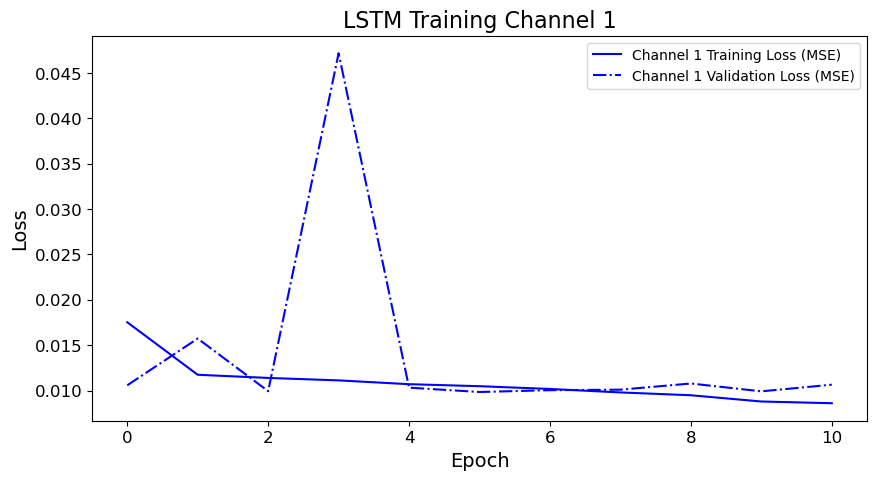

In [45]:
plt.figure(figsize=(10, 5))
plt.plot(history_c1['train_loss'], '-', color = 'b', label = 'Channel 1 Training Loss (MSE)')
plt.plot(history_c1['val_loss'], '-.', color = 'b', label = 'Channel 1 Validation Loss (MSE)')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Loss', fontdict= {'fontsize' : 14})
plt.xlabel('Epoch', fontdict= {'fontsize' : 14})
plt.legend()
plt.title('LSTM Training Channel 1', fontdict={'fontsize' : 16})

Text(0.5, 1.0, 'LSTM Training Channel 2')

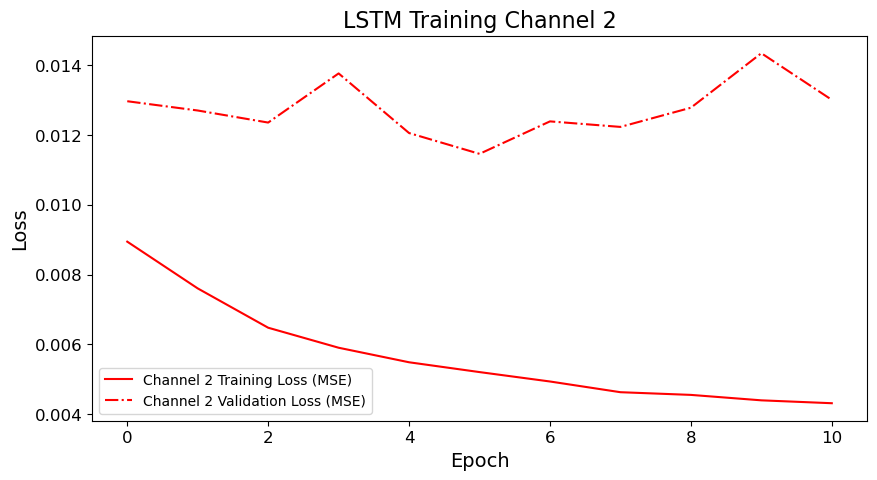

In [47]:
plt.figure(figsize=(10, 5))
plt.plot(history_c2['train_loss'], '-', color = 'r', label = 'Channel 2 Training Loss (MSE)')
plt.plot(history_c2['val_loss'], '-.', color = 'r', label = 'Channel 2 Validation Loss (MSE)')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Loss', fontdict= {'fontsize' : 14})
plt.xlabel('Epoch', fontdict= {'fontsize' : 14})
plt.legend()
plt.title('LSTM Training Channel 2', fontdict={'fontsize' : 16})

Text(0.5, 1.0, 'LSTM Training Channel 3')

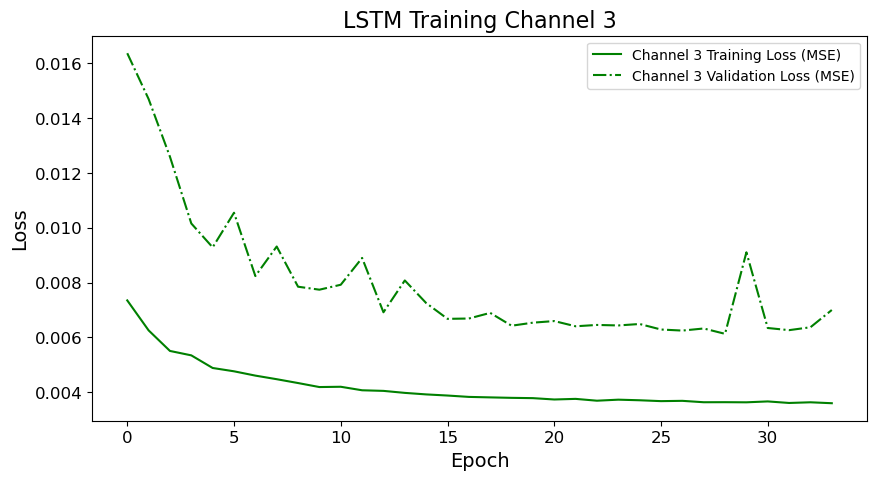

In [43]:
plt.figure(figsize=(10, 5))
plt.plot(history_c3['train_loss'], '-', color = 'g', label = 'Channel 3 Training Loss (MSE)')
plt.plot(history_c3['val_loss'], '-.', color = 'g', label = 'Channel 3 Validation Loss (MSE)')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Loss', fontdict= {'fontsize' : 14})
plt.xlabel('Epoch', fontdict= {'fontsize' : 14})
plt.legend()
plt.title('LSTM Training Channel 3', fontdict={'fontsize' : 16})

Text(0.5, 1.0, 'LSTM Training on all 3 Channels')

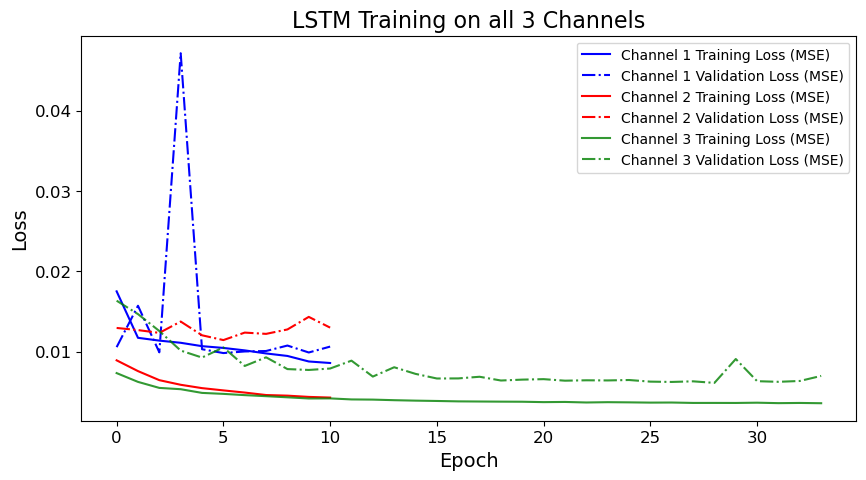

In [51]:

plt.figure(figsize=(10, 5))
plt.plot(history_c1['train_loss'], '-', color = 'b', label = 'Channel 1 Training Loss (MSE)')
plt.plot(history_c1['val_loss'], '-.', color = 'b', label = 'Channel 1 Validation Loss (MSE)')
plt.plot(history_c2['train_loss'], '-', color = 'r', label = 'Channel 2 Training Loss (MSE)')
plt.plot(history_c2['val_loss'], '-.', color = 'r', label = 'Channel 2 Validation Loss (MSE)')
plt.plot(history_c3['train_loss'], '-', color = 'g', label = 'Channel 3 Training Loss (MSE)', alpha = 0.8)
plt.plot(history_c3['val_loss'], '-.', color = 'g', label = 'Channel 3 Validation Loss (MSE)', alpha = 0.8)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Loss', fontdict= {'fontsize' : 14})
plt.xlabel('Epoch', fontdict= {'fontsize' : 14})
plt.legend()
plt.title('LSTM Training on all 3 Channels', fontdict={'fontsize' : 16})

# Evaluation of all models

In [38]:
import torch
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
def evaluate(model, test_loader, method = 'regression'):
    import torch

    # Set model to evaluation mode
    model.eval()

    # Track predictions and ground truths
    all_preds = []
    all_targets = []

    # No gradient computation during evaluation
    with torch.no_grad():
        for batch in test_loader:
            inputs, targets = batch  # Assumes batch is (X, y)
            outputs = model(inputs)  # Forward pass
            all_preds.append(outputs)
            all_targets.append(targets)

    # Concatenate all batches
    all_preds = torch.cat(all_preds).cpu().numpy()
    all_targets = torch.cat(all_targets).cpu().numpy()

    if method == 'regression':
        mse = mean_squared_error(all_targets, all_preds)
        r2 = r2_score(all_targets, all_preds)
        print(f"MSE: {mse:.4f}, R²: {r2:.4f}")
    else:
        raise NotImplementedError(f"Method: {method} not yet implemented!")


In [49]:
print("Channel 1:")
evaluate(lstm_c1, test_loader_c1)
print("Channel 2:")
evaluate(lstm_c2, test_loader_c2)
print("Channel 3:")
evaluate(lstm_c3, test_loader_c3)

Channel 1:
MSE: 0.0199, R²: 0.9735
Channel 2:
MSE: 0.0185, R²: 0.9817
Channel 3:
MSE: 0.0525, R²: 0.9463


In [52]:
total_df = pd.read_csv(r"D:\Repositories\PhD\parsed_data\ICE_data\internal_combustion_engine_bearings_fixed_duplicates.csv")

In [53]:
c1_total = total_df['Channel 1']
c2_total = total_df['Channel 2']
c3_total = total_df['Channel 3']

In [55]:
sp = dp.SignalProcesser()

In [57]:
c1_total = sp.quantile_transformation(c1_total.values)

In [59]:
c2_total = sp.quantile_transformation(c2_total.values)

(array([3.20000e+01, 4.29000e+02, 7.06100e+03, 4.88910e+04, 1.37256e+05,
        1.39371e+05, 4.93540e+04, 7.34500e+03, 2.85000e+02, 3.80000e+01]),
 array([-5.19933758e+00, -4.15947007e+00, -3.11960255e+00, -2.07973503e+00,
        -1.03986752e+00,  4.89217555e-11,  1.03986752e+00,  2.07973503e+00,
         3.11960255e+00,  4.15947007e+00,  5.19933758e+00]),
 <BarContainer object of 10 artists>)

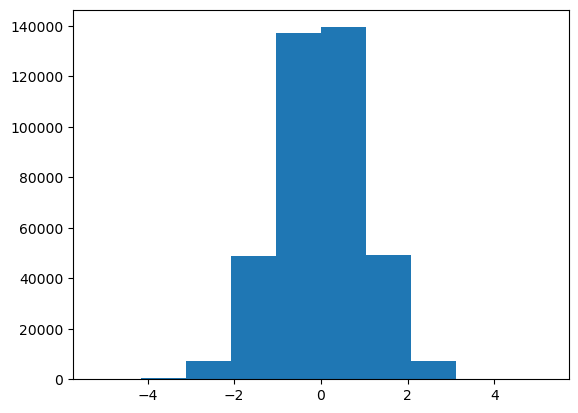

In [60]:
plt.hist(c2_total)

(array([  2493.,   7573.,  20682.,  14311.,  86288., 207715.,  17341.,
         18858.,  11192.,   3609.]),
 array([-2.32604514, -1.81772485, -1.30940456, -0.80108427, -0.29276397,
         0.21555632,  0.72387661,  1.2321969 ,  1.74051719,  2.24883748,
         2.75715778]),
 <BarContainer object of 10 artists>)

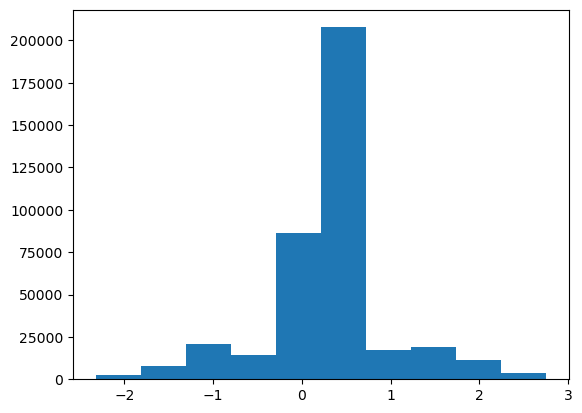

In [61]:
c3_total = sp.log_transform(c3_total)
plt.hist(c3_total)

In [94]:
c3_tensor = data_process.prepare_tensor_for_lstm(pd.Series(c3_total), 10)

In [95]:
lstm_c3.to('cpu')

LSTMModel(
  (lstm): LSTM(1, 64, num_layers=2, batch_first=True)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)

In [96]:
c3_extracted = lstm_c3.extract_features(c3_tensor.to('cpu'))

In [97]:
c3_extracted.shape

(390053, 64)

In [98]:
pd.DataFrame(c3_extracted).to_csv(r"D:\Repositories\PhD\parsed_data\ICE_data\extracted_features_Channel_3.csv", index = False)